In [1]:
!unrar x "/content/drive/MyDrive/Audio_Song_Actors_01-24.rar" "/content/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Audio_Song_Actors_01-24.rar

Creating    /content/Audio_Song_Actors_01-24                          OK
Extracting  /content/Audio_Song_Actors_01-24/03-02-01-01-01-01-01.wav       0%  OK 
Extracting  /content/Audio_Song_Actors_01-24/03-02-01-01-01-01-02.wav       0%  OK 
Extracting  /content/Audio_Song_Actors_01-24/03-02-01-01-01-01-03.wav       0%  OK 
Extracting  /content/Audio_Song_Actors_01-24/03-02-01-01-01-01-04.wav       0%  OK 
Extracting  /content/Audio_Song_Actors_01-24/03-02-01-01-01-01-05.wav       0%  OK 
Extracting  /content/Audio_Song_Actors_01-24/03-02-01-01-01-01-06.wav       0%  OK 
Extracting  /content/Audio_Song_Actors_01-24/03-02-01-01-01-01-07.wav       0%  OK 
Extracting  /content/Audio_Song_Actors_01-24/03-02-01-01-01-01-08.wav       0%  OK 
Extracting  /content/Audio_Song_Actors_01-24/0

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from sklearn.metrics import confusion_matrix
import pandas as pd
import os

In [3]:
mylist= os.listdir('Audio_Song_Actors_01-24/')
# 讀入音檔
print(mylist[400][18:-4])
# 前處理設立個音訊檔對應的label
# 建立出其音訊對應的結果
feeling_list=[]
for item in mylist:
    if item[18:-4]=='01':
        feeling_list.append('male')
    elif item[18:-4]=='02':
        feeling_list.append('female')
    elif item[18:-4]=='03':
        feeling_list.append('male')
    elif item[18:-4]=='04':
        feeling_list.append('female')
    elif item[18:-4]=='05':
        feeling_list.append('male')
    elif item[18:-4]=='06':
        feeling_list.append('female')
    elif item[18:-4]=='07':
        feeling_list.append('male')
    elif item[18:-4]=='08':
        feeling_list.append('female')
    elif item[18:-4]=='09':
        feeling_list.append('male')
    elif item[18:-4]=='10':
        feeling_list.append('female')
    elif item[18:-4]=='12':
        feeling_list.append('female')
    elif item[18:-4]=='13':
        feeling_list.append('male')
    elif item[18:-4]=='14':
        feeling_list.append('female')
    elif item[18:-4]=='15':
        feeling_list.append('male')
    elif item[18:-4]=='16':
        feeling_list.append('female')
    elif item[18:-4]=='17':
        feeling_list.append('male')
    elif item[18:-4]=='19':
        feeling_list.append('male')
    elif item[18:-4]=='21':
        feeling_list.append('male')
    elif item[18:-4]=='22':
        feeling_list.append('female')
    elif item[18:-4]=='23':
        feeling_list.append('male')

04


In [4]:
labels = pd.DataFrame(feeling_list)

df = pd.DataFrame(columns=['feature'])
bookmark=0

In [5]:
# Getting the features of audio files using librosa¶(使用librosa去處理聲音特徵)
# 使用mfcc特徵擷取好處 可以在多個領域中使聲音訊號有更好的表示 它比用於正常的對數倒頻譜中的線性間隔的頻帶更能近似人類的聽覺系統
for index,y in enumerate(mylist):
    X, sample_rate = librosa.load('Audio_Song_Actors_01-24/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs   
    df.loc[bookmark] = [feature]
    bookmark=bookmark+1


In [6]:
df3 = pd.DataFrame(df['feature'].values.tolist())

# ndarray.tolist() 對ndarry做遞歸降維 1維則不變
newdf = pd.concat([df3,labels], axis=1)
# concat() 將df3跟labels整合 預設axis=0

rnewdf = newdf.rename(index=str, columns={"0": "label"})

# shuffle() 洗牌 將陣列打亂
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)

rnewdf=rnewdf.fillna(0)

# Dividing the data into test and train¶
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [7]:
from tensorflow.keras import utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()
y_train = utils.to_categorical(lb.fit_transform(y_train))
y_test = utils.to_categorical(lb.fit_transform(y_test))


x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)
print(x_traincnn)

[[[-53.57652283]
  [-53.57652283]
  [-53.57652283]
  ...
  [-43.71677399]
  [-25.73334694]
  [-17.30877876]]

 [[-61.35652542]
  [-63.29795456]
  [-64.15737152]
  ...
  [-40.74201965]
  [-35.53242493]
  [-31.26841545]]

 [[-52.84895706]
  [-51.44983292]
  [-50.14365768]
  ...
  [-32.29866791]
  [-19.91818237]
  [-12.0265522 ]]

 ...

 [[-54.41120911]
  [-54.51576996]
  [-53.2771759 ]
  ...
  [-31.1500473 ]
  [-23.99413109]
  [-18.8252182 ]]

 [[-61.04907608]
  [-60.43257141]
  [-59.91472626]
  ...
  [-27.82352448]
  [-25.88653564]
  [-20.29135132]]

 [[-49.05580902]
  [-49.29402542]
  [-50.95721436]
  ...
  [-51.67142105]
  [-47.76203156]
  [-41.05688477]]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
# Changing dimension for CNN model
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))# 激活函數
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))# 正則化
model.add(MaxPooling1D(pool_size=(8))) # 池化
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 256)          1536      
_________________________________________________________________
activation (Activation)      (None, 216, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_1 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 27, 128)           8

Epoch 1/50
22/22 [==============================] - 7s 244ms/step - loss: 0.6577 - accuracy: 0.6990 - val_loss: 0.4979 - val_accuracy: 0.9310
Epoch 2/50
22/22 [==============================] - 5s 216ms/step - loss: 0.4693 - accuracy: 0.9335 - val_loss: 0.4393 - val_accuracy: 0.9483
Epoch 3/50
22/22 [==============================] - 5s 217ms/step - loss: 0.3894 - accuracy: 0.9840 - val_loss: 0.4005 - val_accuracy: 0.9368
Epoch 4/50
22/22 [==============================] - 5s 217ms/step - loss: 0.3374 - accuracy: 0.9685 - val_loss: 0.3240 - val_accuracy: 0.9655
Epoch 5/50
22/22 [==============================] - 5s 217ms/step - loss: 0.2875 - accuracy: 0.9686 - val_loss: 0.2804 - val_accuracy: 0.9713
Epoch 6/50
22/22 [==============================] - 5s 217ms/step - loss: 0.2321 - accuracy: 0.9886 - val_loss: 0.2407 - val_accuracy: 0.9713
Epoch 7/50
22/22 [==============================] - 5s 218ms/step - loss: 0.2144 - accuracy: 0.9733 - val_loss: 0.2084 - val_accuracy: 0.9713
Epoch 

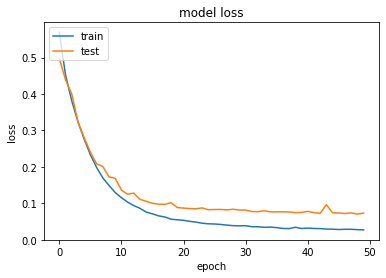

In [9]:
# Removed the whole training part for avoiding unnecessary long epochs list
cnnhistory=model.fit(x_traincnn, y_train, batch_size=32, epochs=50, validation_data=(x_testcnn, y_test))
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
model_name = 'Gender_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Saved trained model at /content/saved_models/Gender_Voice_Detection_Model.h5 
